In [1]:
using Plots
using LinearAlgebra
using LaTeXStrings
using StatsBase
using CSV
using DataFrames

In [2]:
t_start = time();

## Parameters:

In [4]:
mu=1.2;
t = 1;
t0 = 1;
m_0 = -0.2;
Delta = 0.5;

x_periodic = 0;
y_periodic = 0;

L = 80;

ky = 0;

Lx = L;
Ly = L;

exportdata=1;

In [5]:

sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];
gamma_01 = kron(eye2, sigma_x);
gamma_02 = kron(eye2, sigma_y);
gamma_03 = kron(eye2, sigma_z);
gamma_13 = kron(sigma_x,sigma_z);
gamma_30 = kron(sigma_z, eye2);
# gamma_31 = kron(sigma_z, sigma_x);
# gamma_32 = kron(sigma_z, sigma_y);
# gamma_33 = kron(sigma_z, sigma_z);
gamma_12 = kron(sigma_x, sigma_y);
gamma_23 = kron(sigma_y, sigma_z)

4×4 Matrix{Complex{Int64}}:
 0+0im  0+0im  0-1im  0+0im
 0+0im  0+0im  0+0im  0+1im
 0+1im  0+0im  0+0im  0+0im
 0+0im  0-1im  0+0im  0+0im

Equation of two lines are $y = mx + c_1$ and $y = mx + c_2$

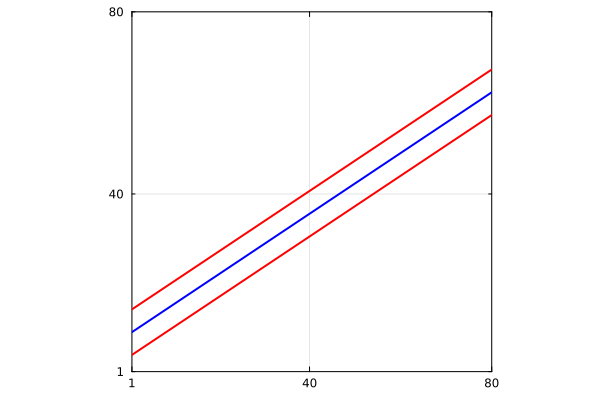

In [6]:
# m = (-1+sqrt(5))/2;
m=2/3
c1 = 4
c2 = 14

function line_down(x::Float64)
    return c1 + m*x
end

function line_up(x::Float64)
    return c2 + m*x
end

function line_middle(x::Float64)
    return (line_up(x) + line_down(x))/2
end

line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plot(line_x,line_down_y,color="red",width=2, xlims=(1,Lx),ylims=(1,Ly),legend=:none,aspect_ratio=:equal,frame=:box, framestyle=:thick,xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly])
plot!(line_x,line_up_y,color="red",width=2)
plot!(line_x,line_middle.(line_x),color="blue",width=2)

In [7]:
points_x_array = range(1, L,L)
points_y_array = range(1, L,L)

points2 = zeros(2*L^2)
for ii = 1:L
    for jj = 1:L
        points2[2*((jj-1)*L+ii)-1] = points_x_array[ii]
        points2[2*((jj-1)*L+ii)] = points_y_array[jj]
    end
end


### These arrays have N^2 elements, and hold the x and y coordinates of nth site
points_x_array = points2[1:2:end]
points_y_array =  points2[2:2:end]

site_index = range(1,L^2, L^2)

1.0:1.0:6400.0

### Now we isolate the PTB points

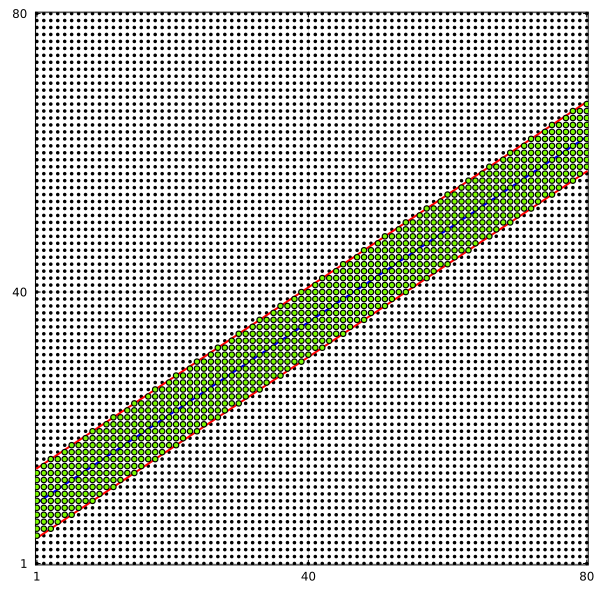

In [8]:
### PTB_index will contain ordered indices of the sites in PTB

PTB_index_dummy = collect(range(1,L^2,L^2))
for ii = 1:L^2
    if (points_y_array[ii] >= line_down(points_x_array[ii])) && (points_y_array[ii] <= line_up(points_x_array[ii]))
        ## Do nothing
    else
        PTB_index_dummy[ii] = 0.0
    end
end

## Here we store non-zero indices
PTB_index = findall(!iszero, PTB_index_dummy)

N_PTB = size(PTB_index)[1]

points_PTB_array_x = zeros(N_PTB)
points_PTB_array_y = zeros(N_PTB)

for ii = 1:N_PTB
    points_PTB_array_x[ii] = points_x_array[PTB_index[ii]]
    points_PTB_array_y[ii] = points_y_array[PTB_index[ii]]
end

### Draw lines separating PTB
line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plt_lattice=scatter(points_x_array, points_y_array,aspect_ratio=1,legend=false, 
                    xlims=[0.8,L+0.2], ylims=[0.8,L+0.2],color="black",markersize=2, frame=:box, framestyle=:thick, xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly], size=(600,600))
plt_lattice=plot!(line_x,line_down_y,color="red",width=2)
plt_lattice=plot!(line_x,line_up_y,color="red",width=2)
plt_lattice=plot!(line_x,line_middle.(line_x),color="blue",width=2)
plt_lattice=scatter!(points_PTB_array_x, points_PTB_array_y,color="lawngreen",aspect_ratio=1,legend=false,markersize=3)

## Percentage of sites in PTB

In [9]:
println("Number of sites in PTB = ",N_PTB)
println("Amount of sites in PTB = ",100* N_PTB/L^2, " %")

Number of sites in PTB = 826
Amount of sites in PTB = 12.90625 %


In [10]:
println(PTB_index)

[321, 401, 402, 403, 481, 482, 483, 484, 561, 562, 563, 564, 565, 566, 641, 642, 643, 644, 645, 646, 647, 721, 722, 723, 724, 725, 726, 727, 728, 729, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1611, 1612, 1613, 1614, 16

## Coordinates of projected sites

### Equation of line_down is $y=mx + c_1$
### Equation of projector line is, $y-y_1 = (-1/m).(x-x_1)$, where $(x_1,y_1)$ is the coordinate of the site
### The two lines intersect at $((m.y_1 + x_1 - m.c_1)/(m^2 + 1), (m^2.y_1 + m.x_1 + c_1)/(m^2 + 1))$

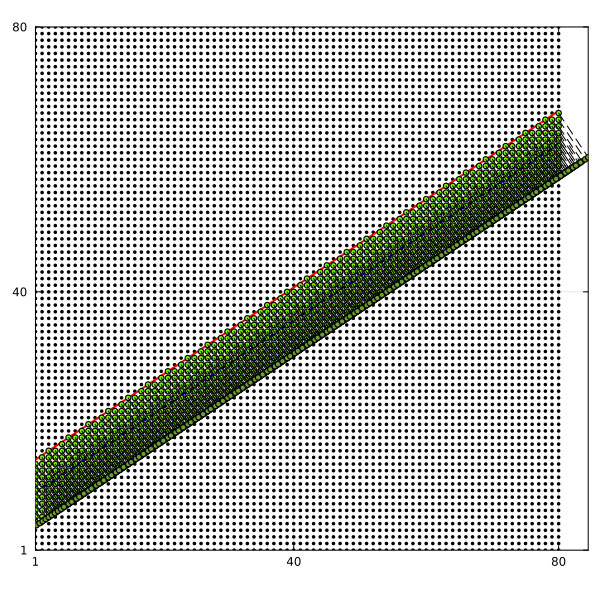

In [11]:
projected_points_PTB_array_x = (m*points_PTB_array_y + points_PTB_array_x - m*ones(N_PTB)*c1)/(m^2 + 1);
projected_points_PTB_array_y = m*projected_points_PTB_array_x + c1 * ones(N_PTB);

## This array contains distance along the line
## This should be x coordinates on the line * sec(theta), where the slope is tan(theta) = m
distance_along_projected_line = projected_points_PTB_array_x * sqrt(m^2 +1)

for ii = 1:N_PTB
    line_projected_x = [points_PTB_array_x[ii],projected_points_PTB_array_x[ii]]
    line_projected_y = [points_PTB_array_y[ii],projected_points_PTB_array_y[ii]]
    plt_lattice=plot!(line_projected_x,line_projected_y,linestyle=:dash, color="black")
end
plt_lattice=scatter!(projected_points_PTB_array_x,projected_points_PTB_array_y, 
            xlims=(1,maximum(vcat(projected_points_PTB_array_x,Lx))), ylims=(1,maximum(vcat(projected_points_PTB_array_y,Ly))), markersize=3)
display(plt_lattice)

## Generate Parent Hamiltonian

In [12]:
include("generate_matrices2D.jl")
include("angmom.jl")

generate_spin_matrices (generic function with 1 method)

In [13]:
println("t = ",t)
println("t0 = ", t0)
println("m_0 = ", m_0)
println("Delta = ", Delta)


println("Lx = ", Lx)
println("Ly = ", Ly)

t = 1
t0 = 1
m_0 = -0.2
Delta = 0.5
Lx = 80
Ly = 80


In [14]:
if(x_periodic^2 != x_periodic || y_periodic^2 != y_periodic)
    println("x_periodic and y_periodic must be 0 or 1")
    println("You entered x_periodic = ", x_periodic, " y_periodic = ", y_periodic)
    return
end

In [ ]:

const_2D, CX2D, SX2D, CY2D, SY2D, CXCY2D, SXCY2D, CXSY2D = generate_matrices_2D(Lx,Ly,x_periodic,y_periodic)

# h_SSH = t*kron(SX2D,gamma_01) + 0*kron(SY2D,gamma_02) + kron(m_0*const_2D- t0*(CX2D + const_2D),gamma_03) + Delta*kron(const_2D,gamma_13) -mu*kron(const_2D,gamma_30)

h_SSH_without_local = t*kron(SX2D,gamma_01) + 0*kron(SY2D,gamma_02) + kron(m_0*const_2D- t0*(CX2D + cos(ky) * const_2D),gamma_03)
# h_SSH_without_local = copy(h_SSH)

if(Hermitian_Check(h_SSH_without_local) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

Verified: Building Block Matrices are Hermitian


## Clear variables

In [ ]:
const_2D= Nothing
CX2D= Nothing
SX2D= Nothing
CY2D= Nothing
SY2D= Nothing
CXCY2D= Nothing
SXCY2D= Nothing
CXSY2D= Nothing

## Now generate PTB Hamiltonian

In [ ]:
PTB_orbital_index = ones(4*N_PTB);
for ii = 1:N_PTB
    PTB_orbital_index[4*ii-3] = 4*PTB_index[ii]-3
    PTB_orbital_index[4*ii-2] = 4*PTB_index[ii]-2
    PTB_orbital_index[4*ii-1] = 4*PTB_index[ii]-1
    PTB_orbital_index[4*ii] = 4*PTB_index[ii]
end
println(PTB_orbital_index)

In [ ]:
outside_orbital_index = setdiff(1:4*Lx*Ly,PTB_orbital_index);
println(outside_orbital_index)

In [ ]:
NOrbitalsOutside = 4*Lx*Ly - 4*N_PTB

In [ ]:
NOrbitalsInside = 4*N_PTB

In [ ]:
H_PTB_renor = zeros(ComplexF64, NOrbitalsInside, NOrbitalsInside);

H_11 = zeros(ComplexF64, NOrbitalsInside, NOrbitalsInside);

H_22 = zeros(ComplexF64, NOrbitalsOutside, NOrbitalsOutside);

H_21 = zeros(ComplexF64, NOrbitalsOutside, NOrbitalsInside);

H_12 = zeros(ComplexF64, NOrbitalsInside, NOrbitalsOutside);

println("Matrix dimensions:")
println("H_11: $(size(H_11))")
println("H_22: $(size(H_22))")
println("H_21: $(size(H_21))")
println("H_12: $(size(H_12))")

In [ ]:
for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsInside
        H_11[ii,jj] = h_SSH_without_local[Int(PTB_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

In [ ]:
Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsOutside
        H_22[ii,jj] = h_SSH_without_local[Int(outside_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

In [ ]:
Threads.@threads for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsOutside
        H_12[ii,jj] = h_SSH_without_local[Int(PTB_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

In [ ]:
Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsInside
        H_21[ii,jj] = h_SSH_without_local[Int(outside_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

## Clear variables

In [ ]:
h_SSH= Nothing
h_SSH_without_local = Nothing

## Add a small constant matrix to invert matrix H_22 in case its eigenvalue is 0

In [ ]:
H_PTB_renor_before_adding_local = H_11 - Hermitian(H_12*inv(Hermitian(H_22 + 10^(-8)*Matrix(1.0I, NOrbitalsOutside, NOrbitalsOutside)))*H_21);

In [ ]:
### generate identity Matrix in PTB space
identity_PTB = zeros(N_PTB,N_PTB);
for ii = 1:N_PTB
    identity_PTB[ii,ii] = 1.0;
end

In [ ]:
H_PTB_renor = H_PTB_renor_before_adding_local + Delta*kron(identity_PTB, gamma_13) - mu*kron(identity_PTB, gamma_30);

In [ ]:
H_11= Nothing
H_12= Nothing
H_21= Nothing
H_22= Nothing

In [ ]:
if(Hermitian_Check(H_PTB_renor) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

### Calculation of local Chern Marker

In [ ]:
## Store the x and y coordinates of the sites in PTB
YList_PTB = ceil.(PTB_index/Lx);
XList_PTB = PTB_index - (YList_PTB - ones(N_PTB))*Lx;

In [ ]:
## Kronecker product to get the orbitals
XListKron_PTB = kron(XList_PTB,[1,1,1,1]);
YListKron_PTB = kron(YList_PTB,[1,1,1,1]);

X1_PTB = diagm(XListKron_PTB);
Y1_PTB = diagm(YListKron_PTB);

In [ ]:
(energy_eigenvalues_PTB, eigenstates_PTB) = eigen(H_PTB_renor);
println(size(eigenstates))
filled_eigenstates_PTB = eigenstates_PTB[:,1:2*N_PTB]

## We create a projector P, which projects to the space of filled eigenstates (half-filled)
P_PTB = conj(filled_eigenstates_PTB) * transpose(filled_eigenstates_PTB)
## Q projects to the empty eigenstates
Q_PTB = kron(diagm(ones(N_PTB)),kron(eye2,eye2)) - P_PTB
W_PTB = kron(diagm(ones(N_PTB)),gamma_12)
## We define the local Chern operators, whose diagonal elements in the Wannier basis are the local Chern numbers per orbital
local_pol_PTB = W_PTB*(Q_PTB*X1_PTB*P_PTB + P_PTB*X1_PTB*Q_PTB);

local_pol_PTBSiteWiseList_PTB = zeros(N_PTB)*im;

## Here we add the two chern numbers for the two orbitals
for ii = 1:N_PTB
    local_pol_PTBSiteWiseList_PTB[ii] = local_pol_PTB[4*ii - 3,4*ii - 3] + local_pol_PTB[4*ii - 2,4*ii - 2] + local_pol_PTB[4*ii - 1,4*ii - 1] + local_pol_PTB[4*ii,4*ii]
end
local_pol_PTBSiteWiseList_PTB = real(local_pol_PTBSiteWiseList_PTB)

In [ ]:
plt2 = scatter(1:N_PTB, local_pol_PTBSiteWiseList_PTB,ylims=(-2,2))
display(plt2)

In [ ]:
Gap_PTB = 2*minimum(abs.(energy_eigenvalues_PTB))

In [ ]:
plt2 = scatter(1:NOrbitalsInside, energy_eigenvalues_PTB, ylims=(-2,2))
display(plt2)

In [ ]:
function state_to_real_space_LDoS(v::Array{ComplexF64})
    n_sites = Int(size(v)[1]/4)
    prob_dist = zeros(n_sites)
    for ii = 1:n_sites
        prob_dist[ii] = abs(v[4*ii-3])^2 + abs(v[4*ii-2])^2 +  abs(v[4*ii-1])^2 +  abs(v[4*ii])^2
    end
    return prob_dist
end 

## Plot of LDoS of topological states of PTB

In [ ]:
#boundary_state_nearest_zero = eigenstates_PTB[:,N_PTB];
probability_boundary_state = state_to_real_space_LDoS(eigenstates_PTB[:,2*N_PTB]) + state_to_real_space_LDoS(eigenstates_PTB[:,2*N_PTB+1]);

color_map = cgrad([RGB(1,1,1), RGB(0,0,1), RGB(1,0,0)])

# Calculate alphas based on y values
function alpha_function(p, pmax)
    if p < pmax/10
        return 0
    else
        return p/pmax
    end
end
alphas = alpha_function.(probability_boundary_state, maximum(probability_boundary_state))

#plt_PTB_BD_states = scatter(distance_along_projected_line, probability_boundary_state)
plt_PTB_BD_states = scatter(distance_along_projected_line, ones(N_PTB), 
                            zcolor=probability_boundary_state, legend=false, xlabel="x", colorbar_title="Value",
                            c=color_map, ms=15, seriesalpha=alphas, markerstrokewidth=0, grid=false,
                            yaxis=false)

display(plt_PTB_BD_states)

In [ ]:
plt_PTB_local_marker_sitewise = scatter(1:N_PTB, local_pol_PTBSiteWiseList_PTB,ylims=(-3,3),yticks=range(-3,3,7))

### Now I isolate sites on the middle line, and plot their local Chern markers

### For each value of x, I find the site on the PTB closest to the middle line

#### Note that this works only if PTB is thick enough to have more than Lx points

In [ ]:
### I generate an array which are the points closest to the middle line
middle_line_x_coordinates = 1:Lx;
middle_line_y_coordinates = round.(line_middle.(float(middle_line_x_coordinates)));

In [ ]:
Indices_of_PTB_middle_points = zeros(Lx);
local_marker_PTB_list_middle_points = zeros(Lx);

for ii = 1:Lx
    for jj = 1:N_PTB
        if (XList_PTB[jj] == middle_line_x_coordinates[ii]) && (YList_PTB[jj] == middle_line_y_coordinates[ii])
            Indices_of_PTB_middle_points[ii] = PTB_index[jj];
            local_marker_PTB_list_middle_points[ii] = local_pol_PTBSiteWiseList_PTB[jj];
        end
    end
end


In [ ]:
mode_chern = modes(round.(local_marker_PTB_list_middle_points))[1]

In [ ]:
### We will plot the local Chern marker along the line y = Ly/2
plt_local_PTB = scatter(1:Lx, local_marker_PTB_list_middle_points, ylims=(-3,3), legend=:none,
                xlabel="x", ylabel="PTB Local Z2 topo marker at middle line", 
                title=string("Lx = ", string(Lx), ", t = ", string(t), ", t0 = ", string(t0), ", m_0 = ", string(m_0), ", Delta = ", string(Delta), ", mu = ", string(mu)),titlefontsize=10)
plt_local_PTB = plot!(1:Lx, mode_chern*ones(Lx), linestyle=:dash, thickness=2, linewidth=2)
display(plt_local_PTB)

In [ ]:
# Define the folder path (relative or absolute)
folder_path = "data/topo_super/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "t0=$(t0)_t=$(t)_m_0=$(m_0)_mu=$(mu)_Delta=$(Delta)_ky=$(ky)_x_periodic=$(x_periodic)_y_periodic=$(y_periodic)_L=$(L)_m=$(m)_c1=$(c1)_c2=$(c2).csv"
filename_without_extension = replace(filename, ".csv" => "")
isdir(string(folder_path,"weak_invariant_commute/")) || mkdir(string(folder_path,"weak_invariant_commute/"))

if exportdata==1
    CSV.write(string(folder_path,"weak_invariant_commute/",filename), (; local_marker_PTB_list_middle_points),writeheader=false)
end

In [ ]:
# if exportdata == 1
#     savefig(plt_local_PTB, string(folder_path, "weak_invariant_commute/plots/central", filename_without_extension, ".png"))
#     savefig(plt_PTB_local_marker_sitewise, string(folder_path, "weak_invariant_commute/plots/all", filename_without_extension, ".png"))
# end

In [ ]:
t_end=time();
println("time taken = ", t_end - t_start," seconds")